# Chapter 8. Resonant Perturbations#

### Action by Evelyn Zagarra Piedrahita, University of Antioquia



In this notebook we will present theory from the Resonant Perturbations and some interesting mathematical developments and simulations will be presented that will serve to better understand the text.

For details on the theory: SOLAR SYSTEM DYNAMICS by the authors Murray and Dermott





The first thing in any code is to import the necessary packages for the code to work correctly, proceed as follows:

## Packages required

In [150]:
# installing the packages
!pip install -q spiceypy
!pip install -q celluloid
!pip install -q rebound

## Importing packages

In [151]:
# important libraries

import spiceypy as spy
import seaborn as sns
import rebound
import numpy as np
import celluloid as cell
import math
import pandas as pd
import matplotlib.pyplot as plt
from celluloid import Camera

## Section 8.2 The Geometry of resonance

### In the following line there will be a brief theoretical context about resonance.

Orbital resonance occurs when orbiting bodies exert regular, periodic gravitational influence on each other, usually because their orbital periods are related by a ratio of small integers. Most commonly, this relationship is found between a pair of objects (binary resonance).

There are two main types of resonances:

*  A **mean-motion orbital resonance** occurs when two bodies have periods of revolution that are a simple integer ratio of each other. Depending on the details, this can either stabilize or destabilize the orbit. Stabilization can occur when the two bodies move so synchronously that they never get too close.

For example:
The orbits of Pluto and the plutinos are stable, despite intersecting with that of the much larger Neptune, because they are in 2:3 resonance with it. The resonance ensures that as they approach perihelion and Neptune's orbit, Neptune is constantly distant (averaging a quarter of its orbit).

Orbital resonances can also destabilize one of the orbits. This process can be harnessed to find energy efficient ways to deorbit spacecraft.

For small bodies, destabilization is actually much more likely. For example:

In the asteroid belt within 3.5 AU of the Sun, the main mean-motion resonances with Jupiter are locations of gaps in the asteroid distribution, the Kirkwood gaps (especially at 4:1, 3:1, 5 :2, 7:3 and 2:1). Asteroids have been kicked out of these nearly empty lanes by repeated disturbances. However, there are still populations of asteroids temporarily present at or near these resonances.
*   A **secular resonance** occurs when the precession of two orbits is in sync (usually a perihelion precession or ascending node). A small body in secular resonance with a much larger one (for example, a planet) will precession at the same rate as the large body. Over a long time (a million years or so) a secular resonance will change the eccentricity and tilt of the small body.

Secular resonances are often studied to determine the long-term orbital evolution of asteroids and their families within the asteroid belt. A particularly well-known case is the secular resonance called v6, which determines the interaction of Saturn's orbital motion over the asteroid belt.




### Experiment 1: Resonance visualization

####**Jupiter and asteroid animation**

First of all, simple considerations are made regarding the dynamics of the bodies, the orbital elements of the asteroid or planet are not taken into account, since resonance needs to be understood first, as shown in the beginning of section 8.1. of the chapter.

### Constants

In [152]:
G = 6.67e-11 # gravitational constatnt [(m**3)(kg**-1)(s**-2)]
au = 1.496e11 # astronomical unit [m]
day = 86400 # [s]
year = 365.25*day # [s]

In [153]:
Msun = 1.98e30 #Jupiter mass [kg]
Mjup = 1.9e27 # Sun mass [kg]
mu = G * Msun # gravitational parameter [(m**3)(s**-2)]

### Configuration of the system

#### initial condition



In [154]:
x = 0
y = 0
x1 = 7.76e11
y1 = 0
x2 = 2.37e11
y2 = 0

From Kepler's third law **(1)** and the relationship of the period with the mean motion **(2)** and in order to understand how a 2:1 resonance of an asteroid with Jupiter would be, the period of Jupiter is calculated, as well as the period that should have the asteroid that is in said resonance.

$(n^2)(a^3)=mu$ **(1)**

$T=\frac{2\pi}{n}$  **(2)**

#### Planet

#### basic properties of the planet´s orbit

In [155]:
a_planet = 5.2038 * au # major semiaxis [m]
t_planet = np.linspace(0, 2*np.pi, 1000)

# eccentricity for a circular orbit, is not the true eccentricity of Jupiter's orbit
e_planet = 0

# From Kepler's third law
n_planet = mu**(1/2) * a_planet**(-3/2) # mean motion [rad/s]
T_planet = 2*np.pi/n_planet # period [s]

print(f"the period of the planet: {T_planet}s = {T_planet/year} years")

the period of the planet: 375545568.6064863s = 11.900320956171772 years


#### Asteroid

The basic properties of the asteroid's orbit are described below.

Assuming the following equation **(3)** given in the book (**eq. 8.1**) that serves to find the period and semi-major axis of the asteroid.

$\frac{n´}{n}=\frac{p}{p+q}$ **(3)**

with n' corresponding to the mean motion of the planet and n as the mean motion of the asteroid.

#### basic properties of the asteroid´s orbit

In [156]:
p = 1 # any integer, in this case at the 2:1 resonance
q = 1 # any integer, in this case at the 2:1 resonance
e_asteroid = 0.5
T_asteroid = (p/(p+q)) * T_planet # asteroid period
t_ast = np.linspace(0, 2*np.pi, 1000)

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years")
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 187772784.30324316 s = 5.950160478085886 years
the major semiaxis of the asteroid: 490417011526.3313 m = 3.278188579721466 au


### Relative configuration of the asteroid and jupiter

Using Rebound, plot (a) of **Fig. 8.1** in the book is simulated, this is done in the simplest way, looking at the initial resonant relationship where at some time t=0, Jupiter and the asteroid are in conjunction and the asteroid is at the perihelion of its orbit.

We leave the time step fixed, just as we did not set the duration of the simulation.
We consider that the asteroid has no mass and that its eccentricity, like that of Jupiter, is equal to zero.


In [157]:
# simulation creation with rebound
sim = rebound.Simulation()
sim.units = ("kg", "m", "s")
sim.add(m=Msun)
sim.add(m=0,a=a_asteroid,e=e_asteroid)
sim.add(m=Mjup,a=a_planet,e=e_planet)

In [158]:
# Calculate positions
x_planet = a_planet * (np.cos(t_planet) - e_planet)
y_planet = a_planet *  np.sqrt(1 - e_planet**2) * np.sin(t_planet)
x_ast = a_asteroid * (np.cos(t_ast) - e_asteroid)
y_ast = a_asteroid * np.sqrt(1 - e_asteroid**2) * np.sin(t_ast)

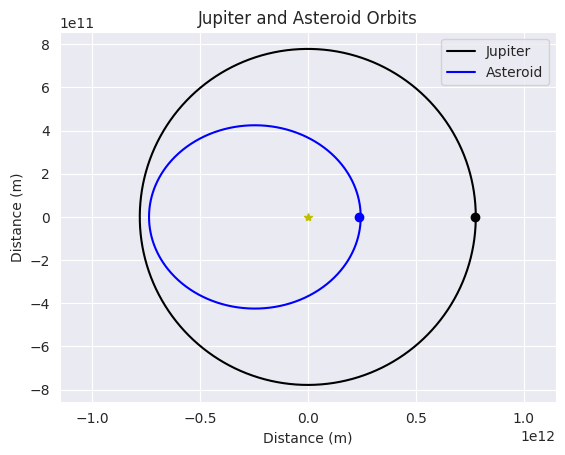

In [159]:
# Plot orbits
x = 0
y = 0
sns.set_style("darkgrid")
sns.set_palette("husl")

plt.plot(x, y, 'y*')
plt.plot(x_planet, y_planet, 'k-', label='Jupiter')
plt.plot(x_ast, y_ast, 'b-',  label='Asteroid')
plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'bo')

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Jupiter and Asteroid Orbits')
plt.legend(loc = 'upper right')

plt.axis("equal")

plt.show()



### Experiment 2: 5:2 Resonance visualization

A necessary test is made to understand how relevant these small integer values of p and q are, taking a p=2 and q=3, seeing how the period of the asteroid behaves in proportion to the period of the planet and it also becomes interesting to see how the semimajor axis of an asteroid at this 5:2 resonance.

In [160]:
p2 = 2
q2 = 3
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p2/(p2+q2)) * T_planet # asteroid period

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years")
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 150218227.44259453 s = 4.760128382468709 years
the major semiaxis of the asteroid: 422628568885.6377 m = 2.8250572786473107 au


### Experiment 3: Plot of e vs a for different main belt asteroids



With the intention that the concept of Orbital Resonance is well understood, resonances with Jupiter of real asteroids in the main asteroid belt are shown.

The first thing we will do is take out the semi-major axis and the eccentricity of the asteroids in the main asteroid belt, then we want to graph the eccentricity vs the semi-major axis (e vs a)

In [161]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
from google.colab import drive

In [163]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
df = pd.read_csv("/content/drive/MyDrive/Astrodinamica/asteroides-mb.csv")
df

,epoch_mjd,a,e,i,om,w,ma
0,60000,2.767,0.0788,10.59,80.26,73.47,17.22
1,60000,2.770,0.2301,34.93,172.92,310.86,357.85
2,60000,2.670,0.2565,12.99,169.84,247.74,351.82
3,60000,2.363,0.0888,7.14,103.76,151.60,115.13
4,60000,2.579,0.1879,5.36,141.52,358.89,256.03
...,...,...,...,...,...,...,...
574760,60000,2.896,0.0759,1.77,4.66,340.45,180.56
574761,60000,2.563,0.1462,8.55,231.88,123.57,173.45
574762,60000,2.935,0.0608,11.71,97.12,94.66,346.33
574763,60000,2.540,0.2159,3.48,280.46,334.59,285.04


#### definition of important variables for the graph

In [165]:
# Semi-major axis for an asteroid at different resonances with Jupiter
a_asteroid_21 = 3.2781 # with q=1 and p=1
a_asteroid_31 = 2.5017 # with q=2 and p=1
a_asteroid_41 = 2.0651 # with q=3 and p=1
a_asteroid_73 = 2.9580 # with q=1 and p=2
a_asteroid_52 = 2.8250 # with q=2 and p=2
e_fx = 0.45
xs = df["a"]
ys = df["e"]

#### Graph a vs e

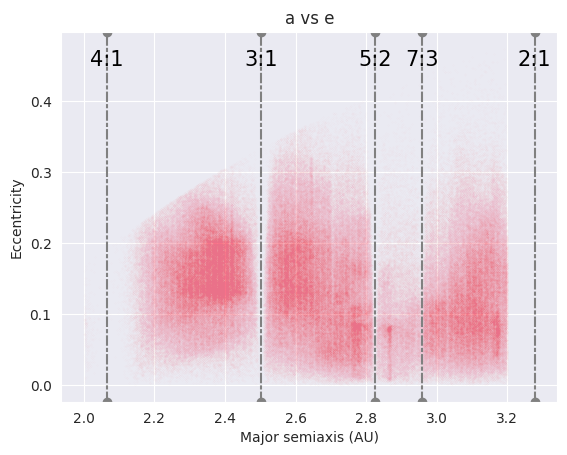

In [166]:
plt.title("a vs e")
plt.xlabel('Major semiaxis (AU)')
plt.ylabel('Eccentricity')
plt.annotate("2:1",xy=(a_asteroid_21,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("3:1",xy=(a_asteroid_31,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("4:1",xy=(a_asteroid_41,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("5:2",xy=(a_asteroid_52,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("7:3",xy=(a_asteroid_73,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.plot(xs,ys,marker="o",lw=0,markersize=0.01)
plt.axvline(a_asteroid_21, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_41, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_31, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_52, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_73, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))


They show how asteroids are distributed in the solar system, being in resonance with Jupiter. These Kirkwood zones or holes are differentiated by determining the semi-major axis of asteroids at those specific resonances, which is achieved as calculated in the 5:2 resonance example.

### Experiment 4: Secular Resonant
Now a trajectory of a moon around a planet so that the moon has periapsis precession, this to understand what generates the $\dot{\overline{w}}$ in equation 8.6 of the book, evidencing that $\dot{\overline{w}}$ represents the speed at which the periapsis advances

In [167]:
deg = np.pi/180
rad = 1/deg

The orbital elements of a moon are chosen below

In [168]:
q = 1
e = 0.5
inc = 0*deg
Omega = 0*deg
omega = 0*deg
M = 0*deg
t0 = 0
mu = 1
elements = [q, e, inc, Omega, omega, M, t0, mu]

We use SPICE with the routine "conics" to calculate the position of the asteroid in space (Cartesian)

In [169]:
estado = spy.conics(elements, t0)

In [170]:
r = estado[:3]
v = estado[3:]

(-3.199985776567005, 1.199999322693667, -1.904217353587514, 1.9052061317114162)

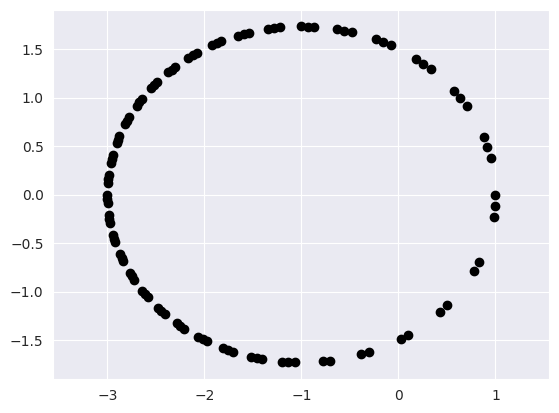

In [171]:
ts = np.linspace(0,50,100)
omegap = 0.01 #the curlypi is fixed

for t in ts:

  omega = omegap*t
  estado = spy.conics(elements, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],"ko")

plt.axis("equal")

We notice that now omega has a different value at each time

Now let us include the perturbing planet for which we define the orbital elements of the perturbing planet

In [172]:
q2 = 3
e2 = 0
inc2 = 0*deg
Omega2 = 0*deg
omega2 = 0*deg
M2 = 0*deg

(-3.2999825088102925,
 3.2999991670862046,
 -3.2965131285230567,
 3.2994493789324664)

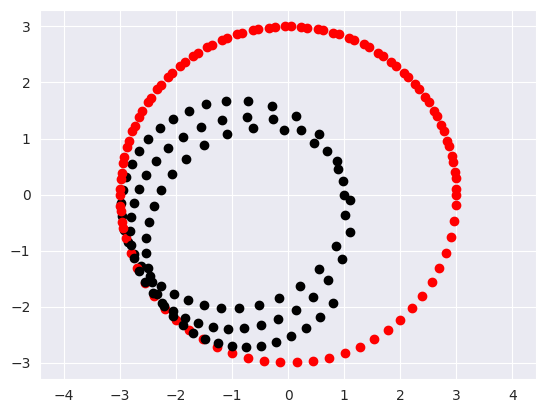

In [173]:
ts = np.linspace(0,50,100)
omegap = 0.02

for t in ts:

    omega = omegap*t
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko')

    elementos2 = [q2, e2, inc2, Omega2, omega2, M2, t0, mu]
    estado = spy.conics(elementos2, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ro')

plt.axis("equal")

### To see the secular resonance

In [174]:
t0 = 0
mu = 1

#Orbital elements of moon
q = 1
e = 0.7
inc = 0*deg
Omega = 0*deg
omega = 0*deg
M0 = 0*deg

#Orbital elements of the disturbing planet
q2 = 3
e2 = 0
inc2 = 0*deg
Omega2 = 0*deg
omega2 = 0*deg
M2 = 0*deg

omegap = 0.05

omega_planet = omegap/2 ##Secular resonance 2:1
Tomega = 2*np.pi/omega_planet
ares = (mu/omega_planet**2)**(1/3)

Let's animate the orbit at each time:

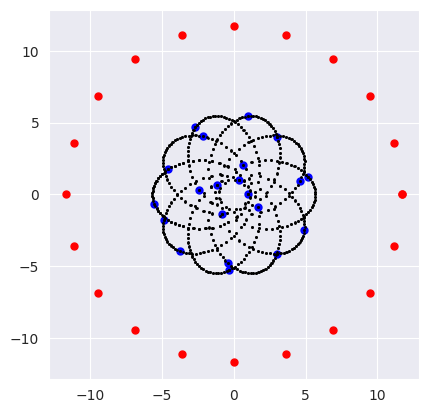

In [175]:
fig,ax=plt.subplots(1,1)
camera=Camera(fig)

ts = np.arange(0,Tomega+0.5*Tomega/20,Tomega/20)

for i,t in enumerate(ts):

  omega = omegap * t

  elementos = [q, e, inc, Omega, omega, M0, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],'bo',ms=5)

  ##This plot the whole oscullant orbit at each time
  for M in np.linspace(0,2*np.pi,50):
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko',ms=1)

  elementos2 = [ares, e2, inc2, Omega2, omega2, M2, t0, mu]
  estado = spy.conics(elementos2, t)
  r = estado[:3]
  v = estado[3:]
  ax.plot(r[0],r[1],"ro",ms=5)
  ax.set_aspect("equal")
  camera.snap()

In [176]:
from IPython.display import HTML
anim=camera.animate()
HTML(anim.to_html5_video())

It is noted how "the osculating orbit" is painted at each time, this in order to understand and see where the periapsis of the orbit is.

Now, let's define the change from degrees to radians and from radians to degrees.

In [177]:
deg=np.pi/180
rad=1/deg

With the intention of seeing each framework of the secular resonance movement, the following considerations are made.

Making the precise calculation of the period of the moon or asteroid, the period of the planet and the precession period of Jupiter's perihelion , additionally taking into account the mean anomaly and eccentricity equations for the eccentric orbit of the planet.

In [178]:
def calculate_ellipse(a,e,peri):
    mu=1
    q=a*(1-e)
    inc=0*deg
    node=0*deg
    M=0*deg
    rs=np.zeros((100,3))
    for i,M in enumerate(np.linspace(0,2*np.pi,100)):
        state=spy.conics([q,e,inc,node,peri,M,0,mu],0)
        rs[i]=state[:3]
    return rs

def point_in_ellipse(a,e,peri,M):
    mu=1
    q=a*(1-e)
    inc=0*deg
    node=0*deg
    state=spy.conics([q,e,inc,node,peri,M,0,mu],0)
    r=state[:3]
    return r

For a 2:1 resonance and considering equations (2) and (3) as a sum of the following equation (4), it is found that the precession period of Jupiter's perihelion is 24 years.

$\frac{1}{T_\dot{\overline{w}´}}=2(\frac{1}{T´})-\frac{1}{T}$ **(4)**


With $T_\dot{\overline{w}´}$  as the precession period of Jupiter's perihelion .

Additionally, through equation (5) the angle that each "object" travels and the precession of perihelion in its respective period is determined.

$\theta=2\pi(\frac{t}{T})$ **(5)**

It is obtained then that the moon or asteroid travels from 90°, the planet travels from h to 60° and the perihelion precession goes from 30°.

A small test graph is made to show how the precession of the periapsis, the planet and the moon is moving.

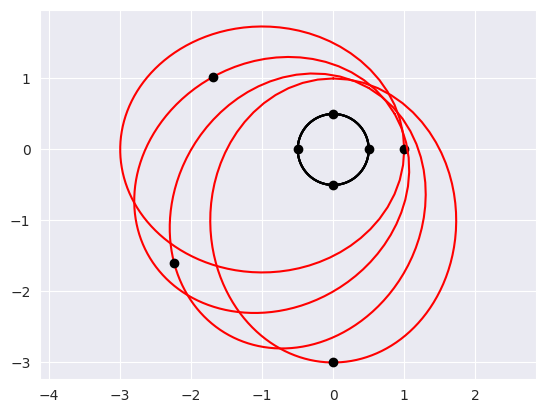

In [179]:
theta = [0, 30, 60, 90]

for angle in theta:
  alpha=angle
  beta=3*angle
  phi=2*angle

  rs=calculate_ellipse(2,0.5,alpha*deg)
  plt.plot(rs[:,0],rs[:,1],'r-')

  rs1=calculate_ellipse(0.5,0.0,alpha*deg)
  plt.plot(rs1[:,0],rs1[:,1],'k-')

  r1=point_in_ellipse(0.5,0.0,90*deg,beta*deg)
  plt.plot(r1[0],r1[1],'ko')

  r3=point_in_ellipse(2,0.5,alpha*deg,phi*deg)
  plt.plot(r3[0],r3[1],'ko')

  plt.axis("equal");
  plt.grid();


Extending it to more angles and seeing it in each frame, the following can be seen:

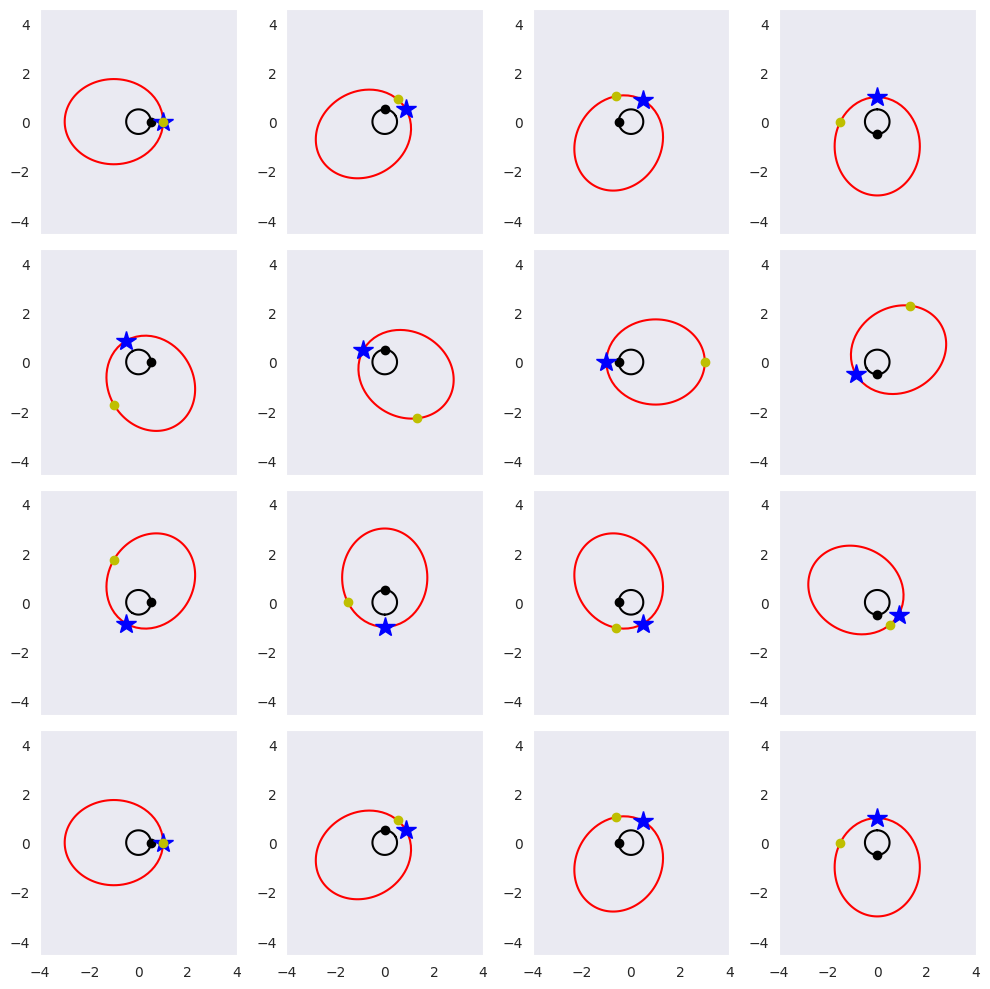

In [180]:
t = np.arange(0,450+15,30)

e = 0.5
ap = 2
aa = 0.5

k=0

fila=[0,0,0,1,0,2,0,3,1,0,1,1,1,2,1,3,2,0,2,1,2,2,2,3,3,0,3,1,3,2,3,3]
fig, ax = plt.subplots(4, 4, figsize=(10,10),sharex = True)

#Puesto
periodo_planeta = 12
n_planeta = 2*np.pi/periodo_planeta

periodo_asteroide = 8
n_asteroide = 2*np.pi/periodo_asteroide

#Calculados
periodo_periapsis = 1/(2/periodo_planeta - 1/periodo_asteroide)
n_periapsis = 2*np.pi/periodo_periapsis
#periodo_periapsis+periodo_periapsis/1+1
for i,t in enumerate(np.arange(0,periodo_periapsis+periodo_periapsis/4+1,2)):

    alpha = n_periapsis*t*rad
    beta = n_asteroide*t*rad
    phi = n_planeta*t*rad

    rs=calculate_ellipse(ap,e,alpha*deg)
    rs1=calculate_ellipse(aa,0.0,alpha*deg)
    r1=point_in_ellipse(aa,0.0,0.0,beta*deg)
    r2=point_in_ellipse(ap,e,alpha*deg,0)

    ax[fila[2*i],fila[2*i+1]].plot(rs[:,0],rs[:,1],'r-')
    ax[fila[2*i],fila[2*i+1]].plot(rs1[:,0],rs1[:,1],'k-')
    ax[fila[2*i], fila[2*i+1]].plot(r1[0],r1[1],'ko')
    ax[fila[2*i], fila[2*i+1]].plot(r2[0],r2[1],'b*',ms=15)

    #Posición del planeta
    f = -(alpha-phi)
    E = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(f*deg/2))
    M = E - e*np.sin(E)
    r3=point_in_ellipse(2,0.5,alpha*deg,M)

    ax[fila[2*i], fila[2*i+1]].plot(r3[0],r3[1],'yo')
    ax[fila[2*i],fila[2*i+1]].axis('equal')

for i in range(4):
  for j in range(4):
       ax[i,j].set(xlim =(-4, 4), ylim =(-4, 4),autoscale_on = False)
       ax[i,j].grid()

fig.tight_layout()


After having those frames we will proceed to show the animation as shown in a small example above.

In [181]:
plt.ioff()
fig, ax = plt.subplots()
camera = cell.Camera(fig)

Nt = 1000
n = int(Nt/100)

for i,t in enumerate(np.arange(0,periodo_periapsis+periodo_periapsis/4+1,2)):

    alpha = n_periapsis*t*rad
    beta = n_asteroide*t*rad
    phi = n_planeta*t*rad
    #print(alpha,beta,phi)

    rs=calculate_ellipse(ap,e,alpha*deg)
    rs1=calculate_ellipse(aa,0.0,alpha*deg)
    r1=point_in_ellipse(aa,0.0,0.0,beta*deg)
    r2=point_in_ellipse(ap,e,alpha*deg,0)
    ax.plot(rs[:,0],rs[:,1],'r-')
    ax.plot(rs1[:,0],rs1[:,1],'k-')
    ax.plot(r1[0],r1[1],'ko')
    ax.plot(r2[0],r2[1],'b*',ms=15)

    #Posición del planeta
    f = -(alpha-phi)
    E = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(f*deg/2))
    M = E - e*np.sin(E)
    #print(f"f = {f}, E = {E*rad}, M = {M*rad}")
    r3=point_in_ellipse(2,0.5,alpha*deg,M)

    ax.plot(r3[0],r3[1],'yo')
    ax.axis('equal')
    camera.snap()

plt.close()
plt.ion();


Now it's time to create the animation:



In [182]:
anim = camera.animate(interval=700)

Show the animation:

In [183]:
HTML(anim.to_html5_video())

### Experiment 5:

The idea of ​​this experiment is to replicate the graphs shown in **Fig.8.3**, with this it is intended to understand how they build it approximately in the chapter and additionally to see how resonance affects the orbits of the objects involved.

In [184]:
letras="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

we will define the calculation of the average motion variables of the asteroid and the semi-major axis of the asteroid, which are essential to have the corresponding resonance.

In this specific case for a 2:1 resonance with an eccentricity e =0.2 (**see Fig.8.3.a**)

***Note***: the letters represent a nomenclature for each point of the orbit in intervals of 1/16 of time.

(-5.720000000000003, 5.720000000000001, -5.720000000000002, 5.7200000000000015)

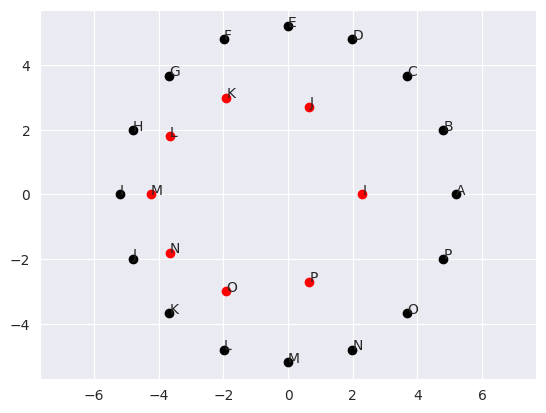

In [185]:
mu=1
aJ=5.2 #Jupiter's semi-major axis
eJ=0 #Jupiter eccentricity
nJ=(mu/aJ**3)**(1/2) #Jupiter's mean motion
PJ=2*np.pi/nJ  #Jupiter period
na=2*nJ #asteroid's mean motion
aa=(mu/na**2)**(1/3) #Asteroid's semi-major axis
ea=0.3 #asteroid eccentricity
for i,t in enumerate(np.arange(0,PJ,PJ/16)):
  MJ=nJ*t
  rJ=point_in_ellipse(aJ,0.0,0.0,MJ)
  plt.plot(rJ[0],rJ[1],'ko')
  plt.text(rJ[0],rJ[1],letras[i])

for j,t in enumerate(np.arange(PJ/2,PJ,PJ/16)):
  Ma=na*t
  ra=point_in_ellipse(aa,ea,0.0,Ma)
  plt.plot(ra[0],ra[1],'ro')
  plt.text(ra[0],ra[1],letras[j+8])

plt.axis("equal")

We can see what the asteroid's orbit looks like when there is an eccentricity other than 0.2, exactly e = 0.3, all under the same 2:1 resonance.

In [186]:
spy.rotate

<function spiceypy.spiceypy.rotate(angle: float, iaxis: int) -> numpy.ndarray>

(-5.717251121412193,
 5.719869101019628,
 -5.7192800102945585,
 5.7192800102945665)

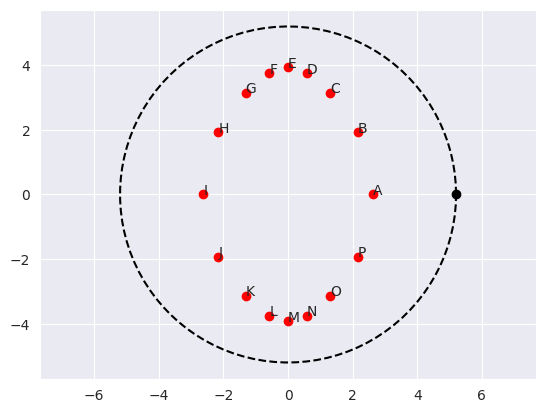

In [187]:
mu=1
aJ=5.2
eJ=0
nJ=(mu/aJ**3)**(1/2)
PJ=2*np.pi/nJ
na=2*nJ
aa=(mu/na**2)**(1/3)
ea=0.2

rs=calculate_ellipse(aJ,eJ,0)
rp=point_in_ellipse(aJ,eJ,0,0)
plt.plot(rs[:,0],rs[:,1],'k--')
plt.plot(rp[0],rp[1],'ko')


for i,t in enumerate(np.arange(0,PJ,PJ/16)):
  MJ=nJ*t
  rJ=point_in_ellipse(aJ,eJ,0.0,MJ)
  teta=np.arctan2(rJ[1],rJ[0])
  M=spy.rotate(teta,3)

  Ma=na*t
  ra=point_in_ellipse(aa,ea,0.0,Ma)
  ra_rot=spy.mxv(M,ra)

  plt.plot(ra_rot[0],ra_rot[1],'ro')
  plt.text(ra_rot[0],ra_rot[1],letras[i])

plt.axis("equal")

Now let's see it for a first order interior resonance corresponding to 3:2 for the same eccentricity of 0.2 of the asteroid.

The following figures are those observed in **Fig. 8.4** of the book

(-5.717251121412193,
 5.719869101019628,
 -5.7192800102945585,
 5.7192800102945665)

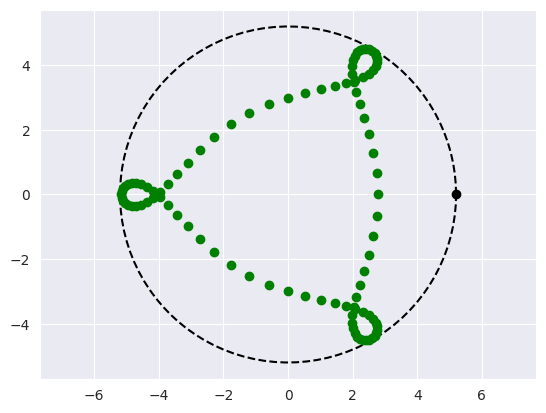

In [188]:
mu=1
aJ=5.2
eJ=0
nJ=(mu/aJ**3)**(1/2)
PJ=2*np.pi/nJ
na=(3/2)*nJ
aa=(mu/na**2)**(1/3)
ea=0.3

rs=calculate_ellipse(aJ,eJ,0)
rp=point_in_ellipse(aJ,eJ,0,0)
plt.plot(rs[:,0],rs[:,1],'k--')
plt.plot(rp[0],rp[1],'ko')

#se disminuye el paso al dividirlo por 100
for i,t in enumerate(np.arange(0,2*PJ,(2*PJ)/100)):
  MJ=nJ*t
  rJ=point_in_ellipse(aJ,eJ,0.0,MJ)
  teta=np.arctan2(rJ[1],rJ[0])
  M=spy.rotate(teta,3)

  Ma=na*t
  ra=point_in_ellipse(aa,ea,0.0,Ma)
  ra_rot=spy.mxv(M,ra)

  plt.plot(ra_rot[0],ra_rot[1],'go')

plt.axis("equal")

It is also interesting to see the construction of an interior resonance of 5:3 for the same eccentricity of 0.3 of the asteroid.

(-5.717251121412193,
 5.719869101019628,
 -5.7192800102945585,
 5.7192800102945665)

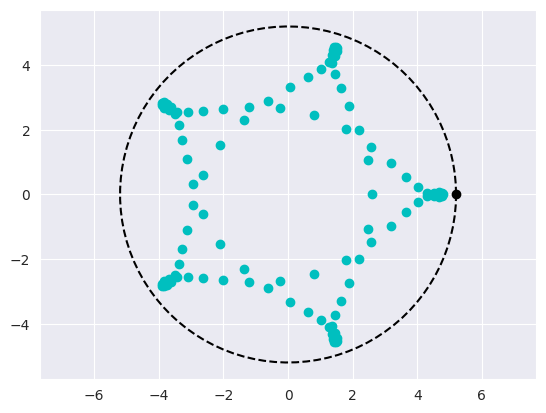

In [189]:
mu=1
aJ=5.2
eJ=0
nJ=(mu/aJ**3)**(1/2)
PJ=2*np.pi/nJ
na=(5/3)*nJ
aa=(mu/na**2)**(1/3)
ea=0.3

rs=calculate_ellipse(aJ,eJ,0)
rp=point_in_ellipse(aJ,eJ,0,0)
plt.plot(rs[:,0],rs[:,1],'k--')
plt.plot(rp[0],rp[1],'ko')


for i,t in enumerate(np.arange(0,3*PJ,(3*PJ)/100)):
  MJ=nJ*t
  rJ=point_in_ellipse(aJ,eJ,0.0,MJ)
  teta=np.arctan2(rJ[1],rJ[0])
  M=spy.rotate(teta,3)

  Ma=na*t
  ra=point_in_ellipse(aa,ea,0.0,Ma)
  ra_rot=spy.mxv(M,ra)

  plt.plot(ra_rot[0],ra_rot[1],'co')

plt.axis("equal")

And finally, let's see the construction of an interior resonance of 5:7 (**Fig. 8.4.d**) for the same eccentricity of 0.1 of the asteroid.

(-7.596250813665627, 7.860980952992309, -7.77554312312336, 7.775543123123352)

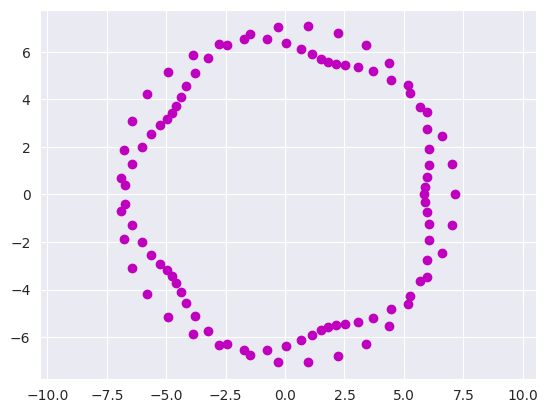

In [190]:
mu=1
aJ=5.2
eJ=0
nJ=(mu/aJ**3)**(1/2)
PJ=2*np.pi/nJ
na=(5/7)*nJ
aa=(mu/na**2)**(1/3)
ea=0.1

for i,t in enumerate(np.arange(0,7*PJ,(7*PJ)/100)):
  MJ=nJ*t
  rJ=point_in_ellipse(aJ,eJ,0.0,MJ)
  teta=np.arctan2(rJ[1],rJ[0])
  M=spy.rotate(teta,3)

  Ma=na*t
  ra=point_in_ellipse(aa,ea,0.0,Ma)
  ra_rot=spy.mxv(M,ra)

  plt.plot(ra_rot[0],ra_rot[1],'mo')

plt.axis("equal")

Varying the eccentricity in the code shows some other figures that can be seen in section 8.2

In [192]:
import ee
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=rFmPEcJVG9C3u7437RSJCBNxryI3YeZKju6S1y2W9X0&tc=FjZD-O9ep6yZ3ZtTbGVCHBDk0bxFFLWc4zeYtWpWqvs&cc=dVnp2r0ZAipOTHYeRbG5y6XtIYQ6_PgzFMNiK2Tro_w

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VPabeGGUeN6ZhVGMx_YOOX5TuXwibcasVkzG2i3c8FWS_pzJfCMHi0

Successfully saved authorization token.
